Инструментарий работы с датами

In [1]:
import datetime
print((datetime.datetime(2022, 9, 19) - datetime.datetime(1970,1,1)).days + 1)
print(datetime.datetime(1970,1,1) + datetime.timedelta(19255 - 1))

curr_date = 18511

def serial_date_to_string(srl_no):
    new_date = datetime.datetime(1970,1,1,0,0) + datetime.timedelta(srl_no)
    return datetime.datetime(
     int(new_date.strftime("%Y")),
     int(new_date.strftime("%m")),
     int(new_date.strftime("%d"))
    ) 
#    return new_date.strftime("%Y-%m-%d")

ser_date = serial_date_to_string(curr_date)
print(ser_date)

sr_date = datetime.datetime(2022, 9, 19) 

today = datetime.datetime(2022, 9, 19)

from datetime import date
import calendar
#my_date = date.today()
print(calendar.day_name[ser_date.weekday()])  #'Wednesday
print('Номер дня = ',ser_date.weekday())

#print(today)
import pandas as pd
import numpy as np
import holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import datetime

for date in holidays.Russia(years=2021).items():
  print(date)

us_holidays  = []
for date in holidays.USA(years=2020).items():
  print(date)  
  us_holidays.append(str(date[0]))

print(us_holidays, end=', ')

print('++++++++\n')
print(us_holidays[10])

cal = USFederalHolidayCalendar()
start_date = '2020-01-01'
end_date = '2023-01-01'
holidays = pd.to_datetime(cal.holidays(start_date, end_date))

print(type(holidays))
print (holidays)
holidays_array = np.array (holidays)

'''
for date in holidays_array:
   print('=')
   print(date)
'''   

#holidays_array = holidays_array.date()

print(holidays_array)
cal = USFederalHolidayCalendar()
holidays = cal.rules

print([holiday.name for holiday in holidays])


import json
import requests

year = "2022"
url = 'https://raw.githubusercontent.com/d10xa/holidays-calendar/master/json/consultant' + year + '.json'
r = requests.get(url)
cal = json.loads(r.text)
if (cal["holidays"].count("2022-12-31")): 
 print('!') # 1-если день праздничный


19255
2022-09-19 00:00:00
2020-09-06 00:00:00
Sunday
Номер дня =  6
(datetime.date(2021, 1, 1), 'Новый год')
(datetime.date(2021, 1, 2), 'Новый год')
(datetime.date(2021, 1, 3), 'Новый год')
(datetime.date(2021, 1, 4), 'Новый год')
(datetime.date(2021, 1, 5), 'Новый год')
(datetime.date(2021, 1, 6), 'Новый год')
(datetime.date(2021, 1, 7), 'Православное Рождество')
(datetime.date(2021, 1, 8), 'Новый год')
(datetime.date(2021, 2, 23), 'День защитника отечества')
(datetime.date(2021, 3, 8), 'День женщин')
(datetime.date(2021, 5, 1), 'Праздник Весны и Труда')
(datetime.date(2021, 5, 9), 'День Победы')
(datetime.date(2021, 6, 12), 'День России')
(datetime.date(2021, 11, 4), 'День народного единства')
(datetime.date(2021, 12, 31), 'Новый год')
(datetime.date(2020, 1, 1), "New Year's Day")
(datetime.date(2020, 1, 20), 'Martin Luther King Jr. Day')
(datetime.date(2020, 2, 17), "Washington's Birthday")
(datetime.date(2020, 5, 25), 'Memorial Day')
(datetime.date(2020, 7, 4), 'Independence Day')

In [2]:
import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials  # Authenticate and create the PyDrive client.
np.random.seed(2022) 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1J1qsdIHcT0dD_Fl7zg_ULOZ11VeucrWg'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train_Holiday.csv') 

df = pd.read_csv("train_Holiday.csv",  index_col=0)  #  index_col=0 -  csv был сохранен с индексом (по умолчанию)
num_rows = df.shape[0]
print ('Изначальный Датасет df содержит: ',num_rows)

Изначальный Датасет df содержит:  2644149


In [3]:
# Обработка пропусков в датасете df
# Функция убирает все колонки, в которых есть отрицательные значения, и возвращает измененный датасет
def getColumnsWithPositiveValues(series):
  return series[series > 0]
# Выводим процент пропусков по каждому столбцу
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# Выводим медианные и средние значения по каждому столбцу
columns_with_nans_series = getColumnsWithPositiveValues(pd.isnull(df).sum())
print(f"Medians20:\n {df.median().filter(items=columns_with_nans_series.keys())}")
print(f"Averages20:\n{df.mean().filter(items=columns_with_nans_series.keys())}")

#Удаление строк с NaN в столбцах cr_scoring и or_scoring

# Удаление строк с пустыми значенийми в целевых столбцах, так как нет смысла заменять их,
# а также их количество мало в сравнении с объемом выборки
df.dropna(inplace=True, subset=['cr_scoring', 'or_scoring'])
getColumnsWithPositiveValues(pd.isnull(df).sum())

#Заполнение оставшихся столбцов медианным значением

# Заполнение оставшихся столбцов медианным значением (на данный момент используется этот вариант)
df = df.fillna(df.median())
getColumnsWithPositiveValues(pd.isnull(df).sum())

pid - 0%
day - 0%
sid - 0%
site_clicks_24h - 0%
dba_clicks_24h - 0%
other_clicks_24h - 0%
site_clicks_3d - 0%
dba_clicks_3d - 0%
other_clicks_3d - 0%
site_clicks_10d - 0%
dba_clicks_10d - 0%
other_clicks_10d - 0%
site_clicks_30d - 0%
dba_clicks_30d - 0%
other_clicks_30d - 0%
site_opens_24h - 0%
dba_opens_24h - 0%
other_opens_24h - 0%
site_opens_3d - 0%
dba_opens_3d - 0%
other_opens_3d - 0%
site_opens_10d - 0%
dba_opens_10d - 0%
other_opens_10d - 0%
site_opens_30d - 0%
dba_opens_30d - 0%
other_opens_30d - 0%
site_delivs_24h - 0%
dba_delivs_24h - 0%
other_delivs_24h - 0%
site_delivs_3d - 0%
dba_delivs_3d - 0%
other_delivs_3d - 0%
site_delivs_10d - 0%
dba_delivs_10d - 0%
other_delivs_10d - 0%
site_delivs_30d - 0%
dba_delivs_30d - 0%
other_delivs_30d - 0%
dba_regs_count - 0%
other_regs_count - 0%
nadays_site - 0%
nadays_dba - 0%
nadays_other - 0%
act_dif_m_site - 24%
act_dif_m_dba - 37%
act_dif_m_other - 70%
reg_dlv_dif_site - 14%
reg_dlv_dif_dba - 31%
reg_dlv_dif_other - 58%
reg_act_dif_s

Series([], dtype: int64)

In [4]:
#df.head
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.MinMaxScaler()

names = df.columns
dt = scaler.fit_transform(df)
scaled_df = pd.DataFrame(dt, columns=names)
df = scaled_df
#df.dropna(axis=1) 
#df = df.fillna(0)
df['cr_scoring'] = np.where(df.cr_scoring < 0.2, 0.0, 1.0) # Все, что < 0.2 считать нулем

df[0:5]

,pid,day,sid,site_clicks_24h,dba_clicks_24h,other_clicks_24h,site_clicks_3d,dba_clicks_3d,other_clicks_3d,site_clicks_10d,...,reg_dlv_dif_dba,reg_dlv_dif_other,reg_act_dif_site,reg_act_dif_dba,reg_act_dif_other,act_dlv_diff_site,act_dlv_diff_dba,act_dlv_diff_other,or_scoring,cr_scoring
0,0.416955,0.006784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866667,0.800000,0.600000,0.633333,0.466667,0.100000,0.100000,0.300000,0.000000,0.0
1,0.446312,0.005427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.733333,0.733333,0.333333,0.600000,0.200000,0.366667,0.133333,0.233333,0.076923,0.0
2,0.182051,0.010855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866667,0.733333,0.600000,0.633333,0.200000,0.100000,0.100000,0.233333,0.000000,0.0
3,0.381281,0.001357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.500000,0.500000,0.200000,0.000000,0.000000,0.100000,0.500000,0.500000,0.000000,0.0
4,0.244460,0.005427,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866667,0.733333,0.600000,0.633333,0.200000,0.100000,0.100000,0.233333,0.000000,0.0


In [5]:
dfs = df[(df['reg_dlv_dif_other'] < 0) |
          (df['reg_dlv_dif_other'] > 1.0) ]
dfs.reg_dlv_dif_other[0:10]          

Series([], Name: reg_dlv_dif_other, dtype: float64)

In [6]:
feature = 'reg_dlv_dif_other'
df[feature].value_counts(normalize = False,bins = 10) 

(0.7, 0.8]       1643242
(0.9, 1.0]        290800
(0.8, 0.9]        166296
(0.6, 0.7]        104619
(0.5, 0.6]         89172
(0.4, 0.5]         75489
(-0.002, 0.1]      68926
(0.3, 0.4]         64196
(0.2, 0.3]         58830
(0.1, 0.2]         55125
Name: reg_dlv_dif_other, dtype: int64

In [7]:
df_true = df[(df['cr_scoring'] == 1.0)] 
df_true[feature].value_counts(normalize = False,bins = 10) 

(0.7, 0.8]       2447
(0.9, 1.0]        474
(-0.002, 0.1]     372
(0.8, 0.9]        276
(0.1, 0.2]        218
(0.6, 0.7]        183
(0.2, 0.3]        172
(0.5, 0.6]        161
(0.3, 0.4]        148
(0.4, 0.5]        146
Name: reg_dlv_dif_other, dtype: int64

In [8]:
# https://dfedorov.spb.ru/pandas/%D0%A0%D0%B0%D0%B7%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B2%20Pandas%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20qcut%20%D0%B8%20cut.html
# - сайт про разделения на подгруппы

In [9]:
df_pair = df[[feature,  'cr_scoring']]


In [10]:
import matplotlib.pyplot as plt
from sklearn import datasets
#fig, axs = plt.subplots(1, 2)

import seaborn as sns
df = df[0:10000]

feature = 'reg_dlv_dif_other'

plt.figure(figsize=(300, 130))

#sns.countplot(df[feature])
sns.set(style="darkgrid")
ax = sns.countplot(x=feature,  data=df_pair)

print('0->')

0->


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


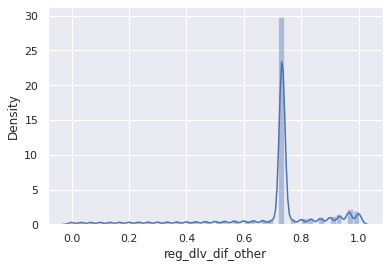

In [11]:
sns.distplot(df_pair[feature]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


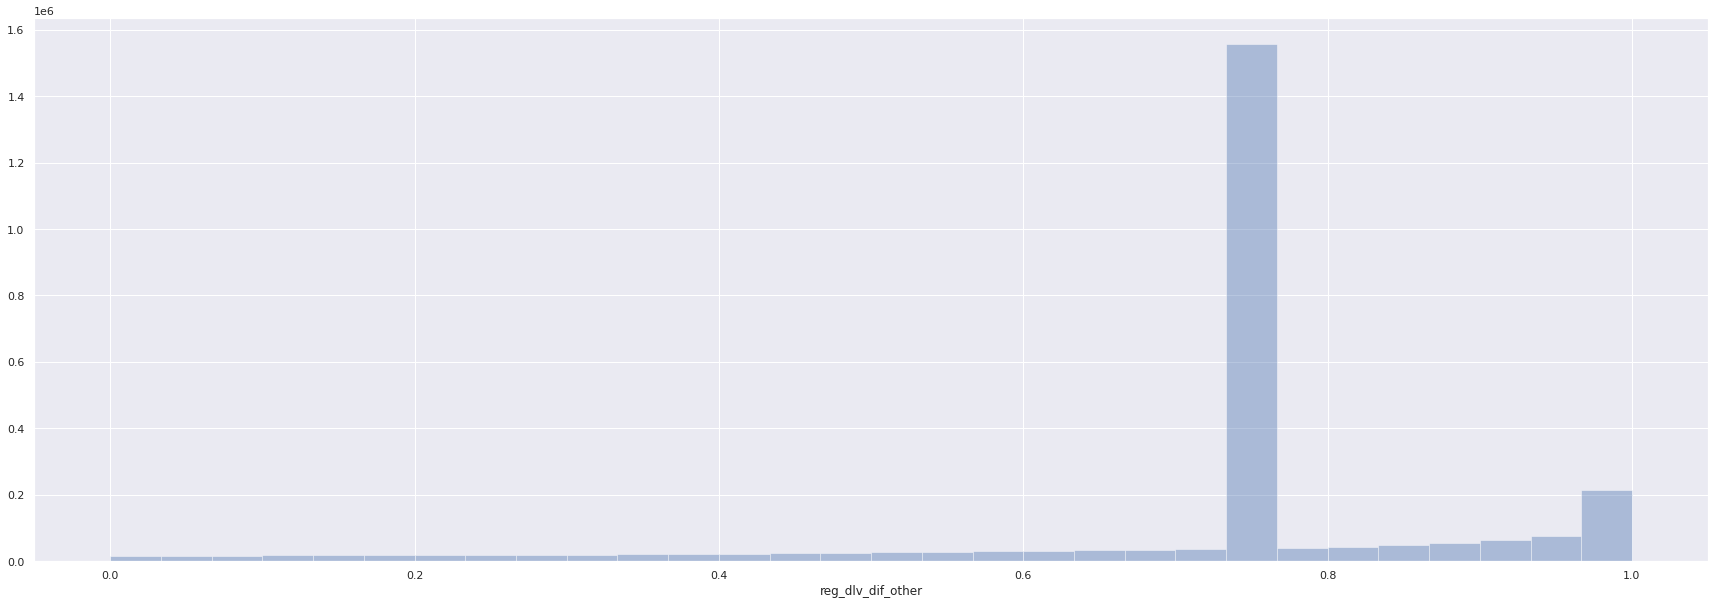

In [12]:
plt.figure(figsize=(30, 10))
sns.distplot(df_pair[feature], kde=False, bins=30);

In [13]:
#sns.kdeplot(df_pair[feature], df_pair['cr_scoring']);

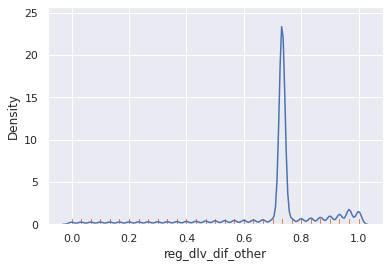

In [14]:
sns.kdeplot(df_pair[feature])
sns.rugplot(df_pair[feature]);

1->


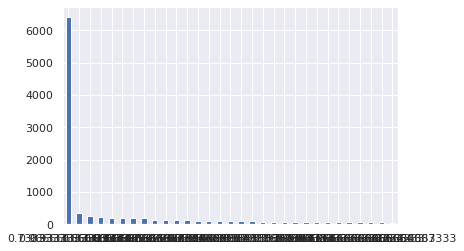

In [15]:
#plt.figure(figsize=(300, 130))
df[feature].value_counts().plot.bar(rot=0, grid=True)

print('1->')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2 ->


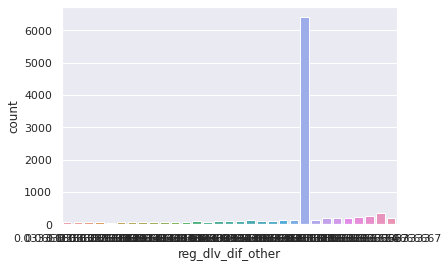

In [16]:
sns.countplot(df[feature])

print('2 ->')

3 ->


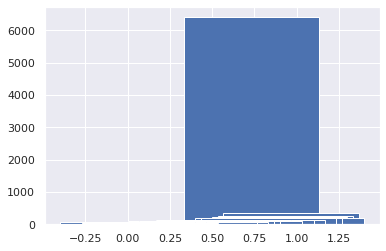

In [17]:
b = df[feature].value_counts()
plt.bar(b.index, b.values)

print('3 ->')

#n_bins = len(df)

4 ->


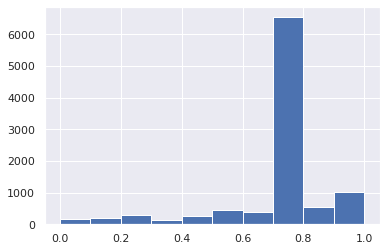

In [19]:
import matplotlib.pyplot as plt 
h = df[feature].hist()
fig = h.get_figure()
print('4 ->')

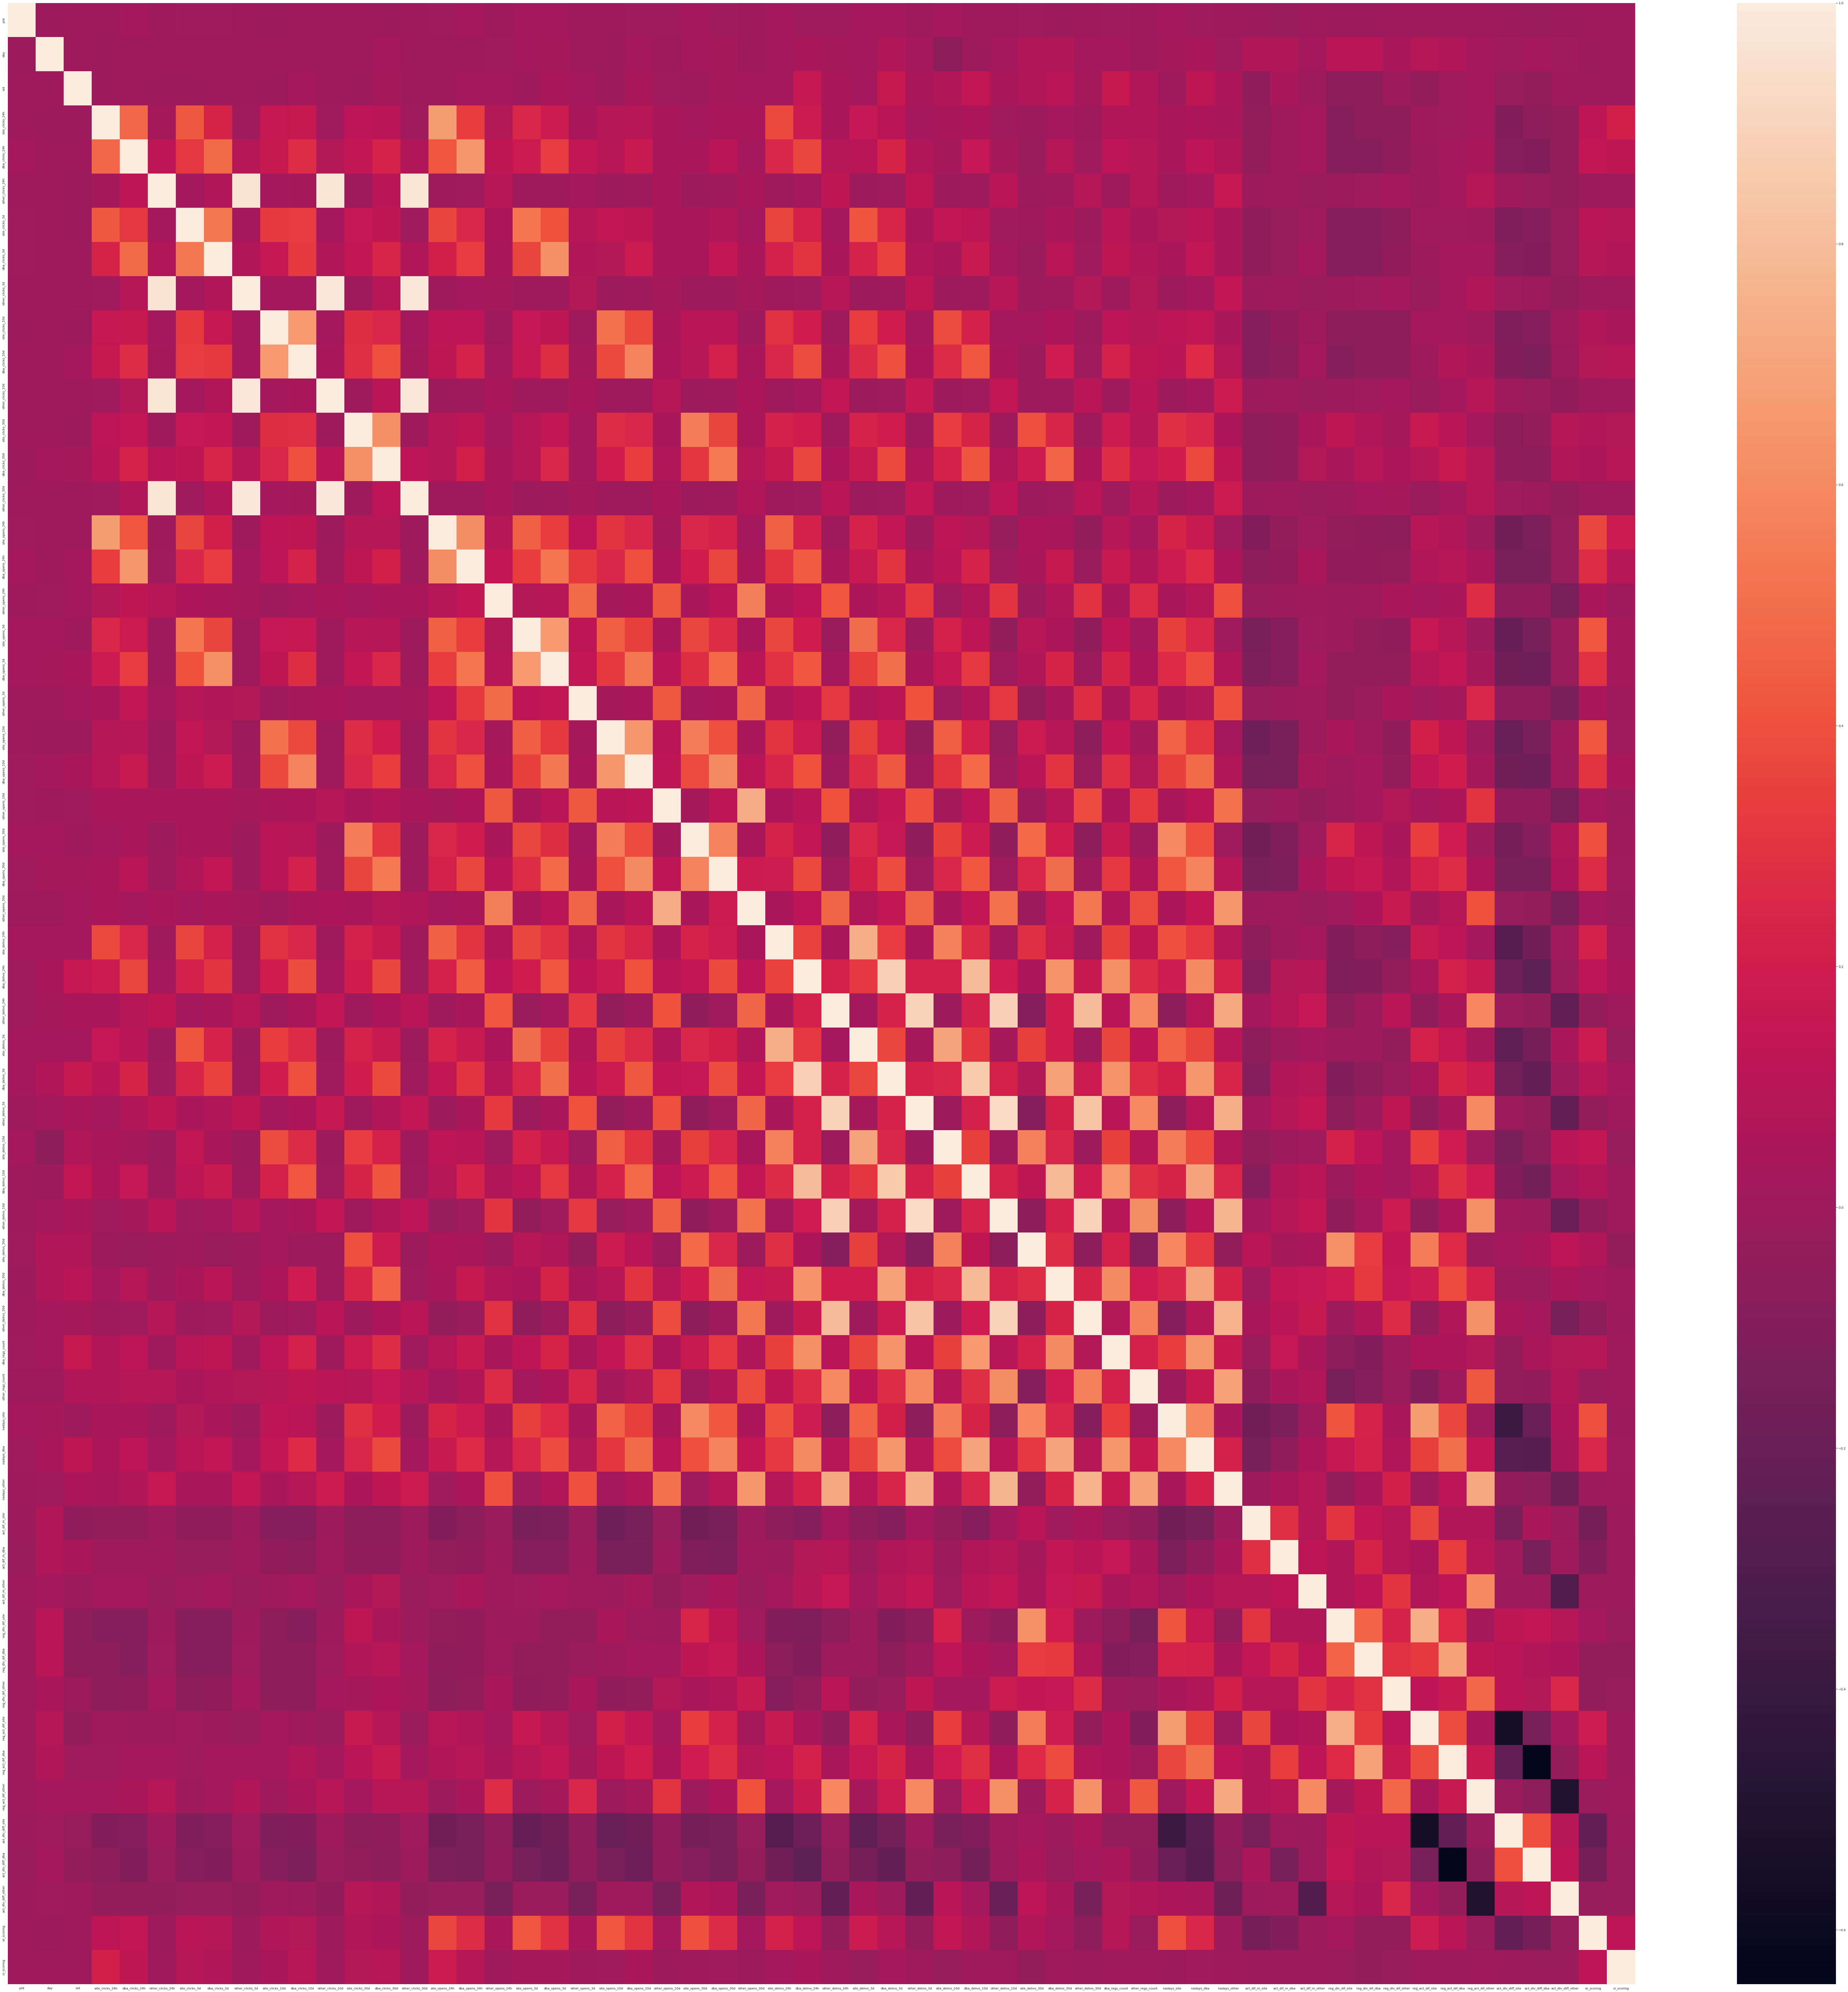

In [20]:
# Тепловая карта
plt.figure(figsize=(130, 130))
sns.heatmap(df.corr());

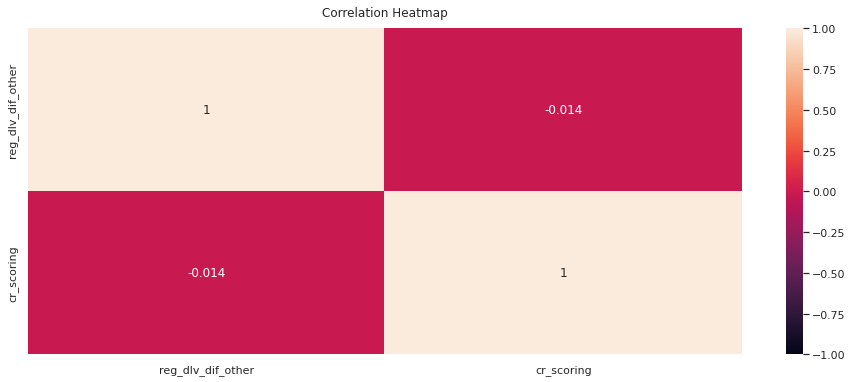

In [22]:
# Увеличьте размер 
plt.figure(figsize=(16, 6)) 

# Сохраните объект тепловой карты в переменной, чтобы легко получить к нему доступ, 
# когда вы захотите включить дополнительные функции (например, отображение заголовка). 
# Задайте диапазон значений для отображения на цветовой карте от -1 до 1 и установите для аннотации (annot) значение True, 
# чтобы отобразить числовые значения корреляции на тепловой карте. 

heatmap = sns.heatmap(df_pair.corr(), vmin=-1, vmax=1, annot=True) 

# Дайте тепловой карте название. Параметр pad (padding) определяет расстояние заголовка от верхней части тепловой карты. 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);